In [1]:
!python3 -V

Python 3.10.4


In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), \
(test_images, test_labels)= mnist.load_data()

2022-09-23 15:56:49.621766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-23 15:56:49.760277: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-23 15:56:50.289740: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-23 15:56:50.289796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

## 讀取資料

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
x= train_images[5537]
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  22, 139, 212, 253, 159, 138,  11,   0,   0,   0,   0,   0,
          0,   0],
       [  

## 查看第5537個數字是多少  

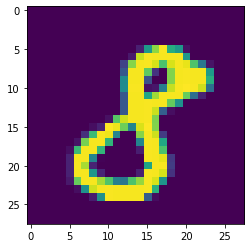

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [6]:
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 22139212253159138 11  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 17234253252252252252136  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 51209252253240183240252247184101 13  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 70252252192 37  0207252253252252139  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0122252252 63  0  0207252253252252160  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0123253253 11 15108233253255253236 94  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 70252252151219252252252196 9

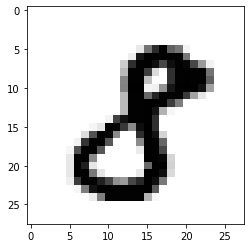

In [7]:
import matplotlib.pyplot as plt
digit = train_images[5537]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
y= train_labels[5537]
y

8

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

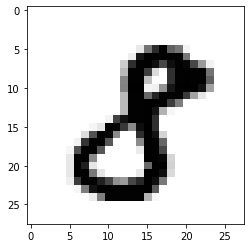

In [11]:
import matplotlib.pyplot as plt
digit = train_images[5537]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [12]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

## 一開始都沒設定，所跑出來的準確率只有25%

In [13]:
# The network architecture
from tensorflow import keras
from tensorflow.keras import layers
my_model = keras.Sequential([
    layers.Dense(512),
])

# The compilation step
my_model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# "Fitting" the model

my_model.fit(train_images, train_labels)
my_model.evaluate(train_images, train_labels)

2022-09-23 15:57:05.723254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-23 15:57:05.752504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-23 15:57:05.752531: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-23 15:57:05.753658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

 133/1875 [=>............................] - ETA: 1s - loss: 5.4314 - accuracy: 0.2556

2022-09-23 15:57:10.487645: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 884us/step - loss: 5.3954 - accuracy: 0.2543


[5.395418167114258, 0.2542833387851715]

## 加一層 Dense(128, activation="relu") 和 epochs=10, batch_size=28
結果準確率更低了

In [15]:
[3.9874072074890137, 0.3876666724681854]
# The network architecture
from tensorflow import keras
from tensorflow.keras import layers
my_model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(128, activation="relu")
])

# The compilation step
my_model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# "Fitting" the model
my_model.fit(train_images, train_labels, epochs=10, batch_size=28)
my_model.evaluate(train_images, train_labels)

Epoch 1/10


2022-09-23 15:59:51.192939: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


2143/2143 [==============================] - 6s 3ms/step - loss: 4.7980 - accuracy: 0.1173
Epoch 2/10
2143/2143 [==============================] - 6s 3ms/step - loss: 4.5930 - accuracy: 0.1313
Epoch 3/10
2143/2143 [==============================] - 6s 3ms/step - loss: 4.4629 - accuracy: 0.1367
Epoch 4/10
2143/2143 [==============================] - 6s 3ms/step - loss: 4.5082 - accuracy: 0.1296
Epoch 5/10
2143/2143 [==============================] - 6s 3ms/step - loss: 4.4283 - accuracy: 0.1407
Epoch 6/10
2143/2143 [==============================] - 6s 3ms/step - loss: 4.4358 - accuracy: 0.1419
Epoch 7/10
2143/2143 [==============================] - 6s 3ms/step - loss: 4.3810 - accuracy: 0.1469
Epoch 8/10
2143/2143 [==============================] - 6s 3ms/step - loss: 4.2098 - accuracy: 0.1721
Epoch 9/10
2143/2143 [==============================] - 6s 3ms/step - loss: 4.2406 - accuracy: 0.1737
Epoch 10/10
1875/1875 [==============================] - 2s 803us/step - loss: 4.3472 - accur

[4.347225666046143, 0.1609666645526886]

## 把 activation 改成 softmax
準確率發生了質的飛越提高到了99.22％！！！

In [16]:
# The network architecture
from tensorflow import keras
from tensorflow.keras import layers
my_model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(100, activation="softmax")
])

# The compilation step
my_model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# "Fitting" the model
my_model.fit(train_images, train_labels, epochs=5, batch_size=28)
my_model.evaluate(train_images, train_labels)

Epoch 1/5
2143/2143 [==============================] - 6s 2ms/step - loss: 0.2115 - accuracy: 0.9384
Epoch 2/5
2143/2143 [==============================] - 5s 2ms/step - loss: 0.0928 - accuracy: 0.9739
Epoch 3/5
2143/2143 [==============================] - 5s 3ms/step - loss: 0.0667 - accuracy: 0.9816
Epoch 4/5
2143/2143 [==============================] - 5s 3ms/step - loss: 0.0552 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 2s 794us/step - loss: 0.0298 - accuracy: 0.9922


[0.029830848798155785, 0.9921833276748657]

## 把 batch_size 提高至 128 準確率又比原本的28提升至99.87％


In [17]:
# The network architecture
from tensorflow import keras
from tensorflow.keras import layers
my_model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(100, activation="softmax")
])

# The compilation step
my_model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# "Fitting" the model
my_model.fit(train_images, train_labels, epochs=10, batch_size=128)
my_model.evaluate(train_images, train_labels)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2852 - accuracy: 0.9198
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1108 - accuracy: 0.9670
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9840
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0395 - accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0304 - accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 0.9931
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0177 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0136 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 1s 761us/step - loss: 0.0057 - accuracy: 0.

[0.005742198321968317, 0.9987166523933411]

## 把隱藏層多加一層 keras.layers.Dense(50,  activation= 'relu') 結果與只有一層的差不多

In [19]:
# The network architecture
from tensorflow import keras
from tensorflow.keras import layers
my_model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
])

# The compilation step
my_model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# "Fitting" the model
my_model.fit(train_images, train_labels, epochs=10, batch_size=128)
my_model.evaluate(train_images, train_labels)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2501 - accuracy: 0.9257
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9710
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0612 - accuracy: 0.9809
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.9856
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0332 - accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0153 - accuracy: 0.9953
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0120 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.0042 - accuracy: 0.

[0.004167775623500347, 0.9987666606903076]

## 將訓練好的model拿來進行預測，測試的準確率為98.28%，相當的不錯

In [23]:
# Using the model to make predictions

test_digits = test_images[0:100]
print(test_digits.shape)
predictions = my_model.predict(test_digits)

# Evaluating the model on new data

test_loss, test_acc = my_model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

(100, 784)
313/313 [==============================] - 0s 701us/step - loss: 0.0764 - accuracy: 0.9828
test_acc: 0.9828000068664551


In [24]:
# Data representations for neural networks
import numpy as np
x = np.array(12)
x.ndim

0

In [25]:
# Vectors
x = np.array([12, 3, 6, 14, 7])
x.ndim

1

In [26]:
1
# Matrices
x = np.array([[5, 78, 2, 34, 0],
 [6, 79, 3, 35, 1],
 [7, 80, 4, 36, 2]])
print(x.ndim)
x1 = x.reshape(5,3)
print(x1)
print(x1.ndim)

2
[[ 5 78  2]
 [34  0  6]
 [79  3 35]
 [ 1  7 80]
 [ 4 36  2]]
2


In [27]:
# Rank-3 and higher-rank tensors
x = np.array([[[5, 78, 2, 34, 0],
 [6, 79, 3, 35, 1],
 [7, 80, 4, 36, 2]],
 [[5, 78, 2, 34, 0],
 [6, 79, 3, 35, 1],
 [7, 80, 4, 36, 2]],
 [[5, 78, 2, 34, 0],
 [6, 79, 3, 35, 1],
 [7, 80, 4, 36, 2]]])
x.ndim 

3

In [28]:
# Key attributes
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)
print(train_images.size)
print(train_images.nbytes)

3
(60000, 28, 28)
uint8
47040000
47040000


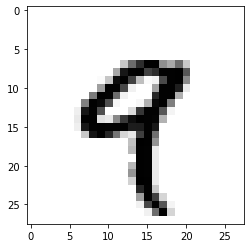

In [29]:
# The fourth sample in our dataset
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [30]:
my_slice = train_images[:, 14:, 14:]
my_slice

array([[[240, 253, 253, ...,   0,   0,   0],
        [ 45, 186, 253, ...,   0,   0,   0],
        [  0,  16,  93, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[241, 243, 234, ...,   0,   0,   0],
        [143,  91,  28, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[253, 254, 253, ...,   0,   0,   0],
        [ 72, 192, 254, ...,   0,   0,   0],
        [  0,   6, 242, ...,   0,   0,   0

In [31]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice


array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

In [32]:
# The notion of data batches
batch = train_images[:128]
print(batch)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [33]:
batch = train_images[128:256]
print(batch)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [34]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
print(batch)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [35]:

# Looking back at our first example
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [36]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [37]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2543 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0672 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.9888


In [39]:
# Reimplementing our first example from scratch in TensorFlow
# A simple Dense class
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [40]:
# A simple Sequential class
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
               x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [41]:
# A batch generator
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [42]:
# Running one training step
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [43]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [44]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [45]:
# The full training loop
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [46]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.57
loss at batch 100: 2.23
loss at batch 200: 2.22
loss at batch 300: 2.08
loss at batch 400: 2.23
Epoch 1
loss at batch 0: 1.91
loss at batch 100: 1.87
loss at batch 200: 1.84
loss at batch 300: 1.70
loss at batch 400: 1.83
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.57
loss at batch 200: 1.52
loss at batch 300: 1.42
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.33
loss at batch 200: 1.25
loss at batch 300: 1.20
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.14
loss at batch 200: 1.05
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.01
loss at batch 200: 0.91
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.89
loss at batch 100: 0.90
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.80
loss at batch 100: 0.81
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

In [47]:
# Evaluating the model
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

# Summary
print(train_images.itemsize)

accuracy: 0.81
4
